# Ddareungi Challenge

한 시간 전 데이터를 통해 현재의 자전거 대여량 예측하기

#table_of_contents

## Import package

In [1]:
import pandas as pd
import numpy as np
import missingno as msno

import sys
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
df_train = pd.read_csv('../../input/ddareung/train.csv')
df_test = pd.read_csv('../../input/ddareung/test.csv')

In [3]:
df_train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [4]:
df_test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [5]:
print(df_train.shape)
print(df_test.shape)

(1459, 11)
(715, 10)


### Column 자료형 확인

- infro() : 각 column 정보 보기

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


## Exploratory Data Analysis (EDA)

### missing data
- hour_bef_temperature (2 missings)
- hour_bef_precipitation 
- hour_bef_humidity
- hour_bef_visibility
- hour_bef_windspeed (9 missings)
- hour_bef_ozone (76 missings)
- hour_bef_pm10 (90 missings)
- hour_bef_pm2.5 (117 missings)

<AxesSubplot:>

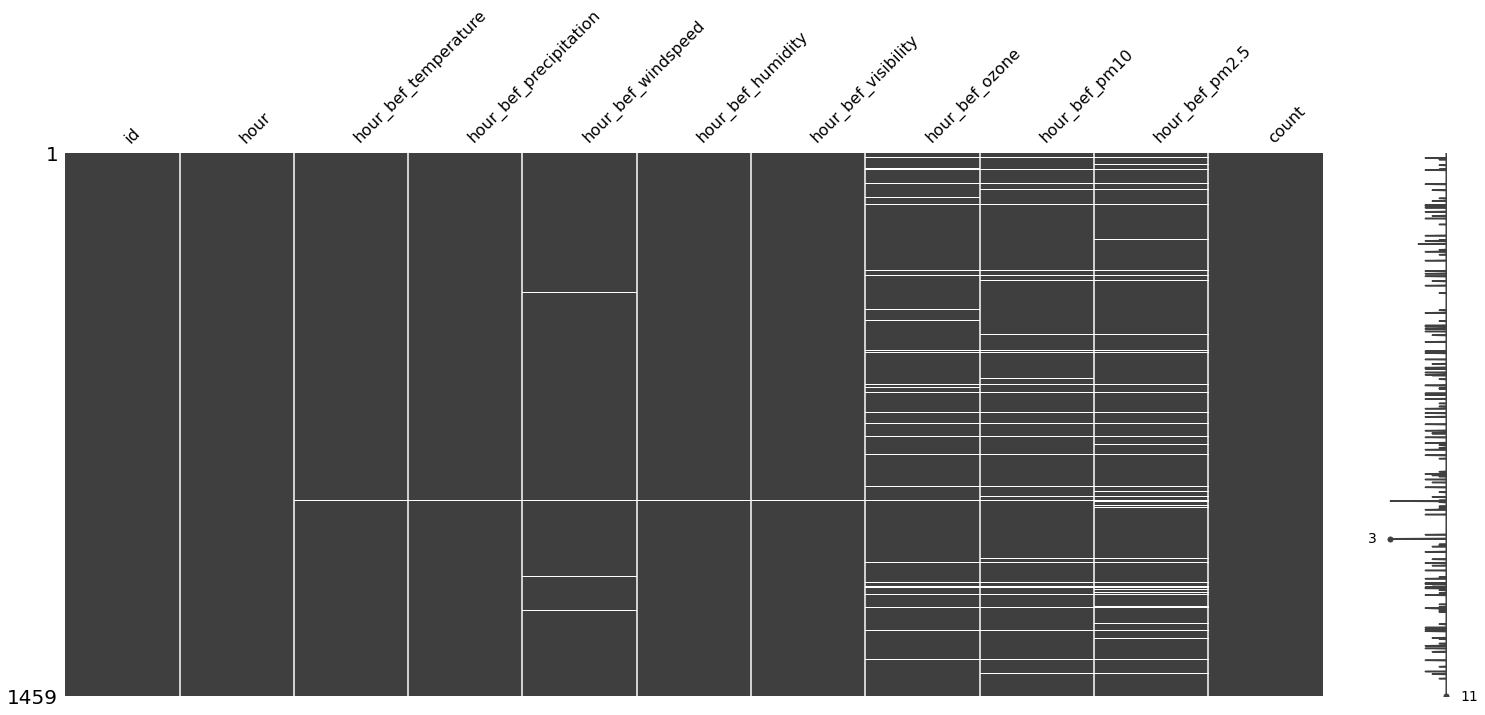

In [8]:
msno.matrix(df_train)

<AxesSubplot:>

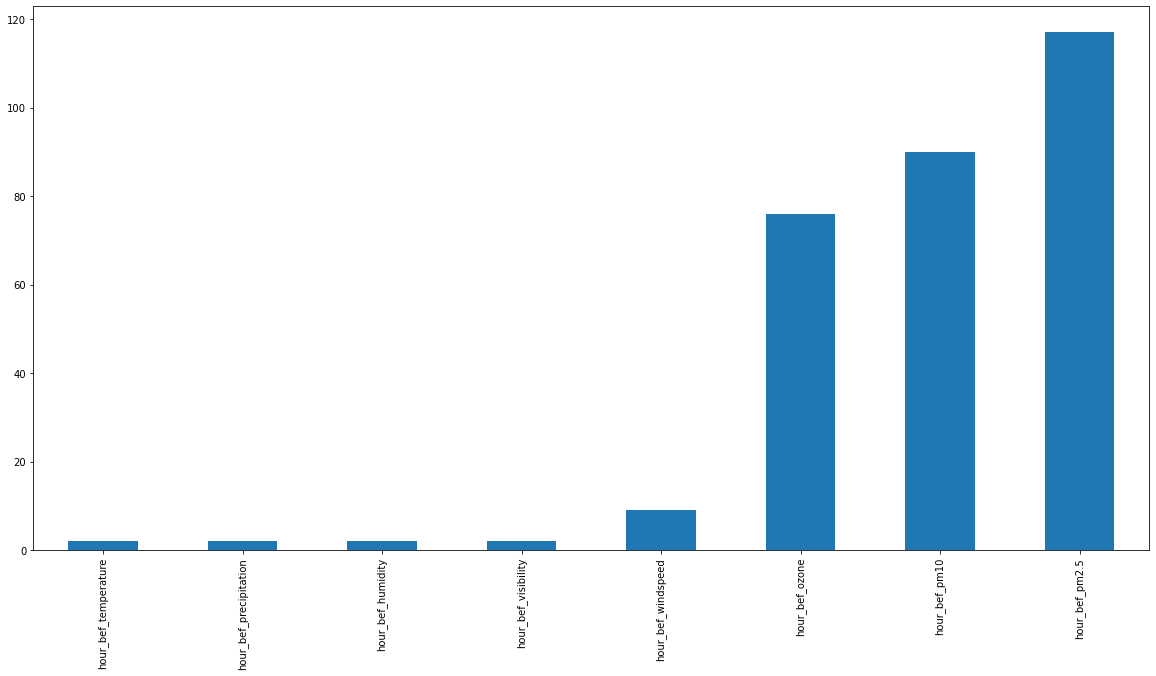

In [9]:
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (20,10))

### 기술통계량 확인

- describe() : 각 feature 별 통계치 반환

In [10]:
print(df_train.describe())
print(df_test.describe())

                id         hour  hour_bef_temperature  hour_bef_precipitation  \
count  1459.000000  1459.000000           1457.000000             1457.000000   
mean   1105.914325    11.493489             16.717433                0.031572   
std     631.338681     6.922790              5.239150                0.174917   
min       3.000000     0.000000              3.100000                0.000000   
25%     555.500000     5.500000             12.800000                0.000000   
50%    1115.000000    11.000000             16.600000                0.000000   
75%    1651.000000    17.500000             20.100000                0.000000   
max    2179.000000    23.000000             30.000000                1.000000   

       hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
count         1450.000000        1457.000000          1457.000000   
mean             2.479034          52.231297          1405.216884   
std              1.378265          20.370387           583.1317

<AxesSubplot:xlabel='hour'>

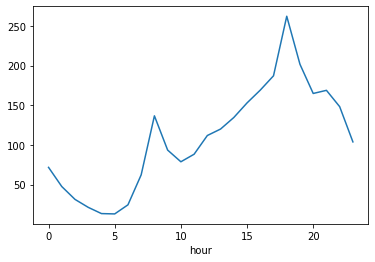

In [11]:
df_train.groupby('hour').mean()['count'].plot()

### Visualization

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

Text(18, 250, 'peak2')

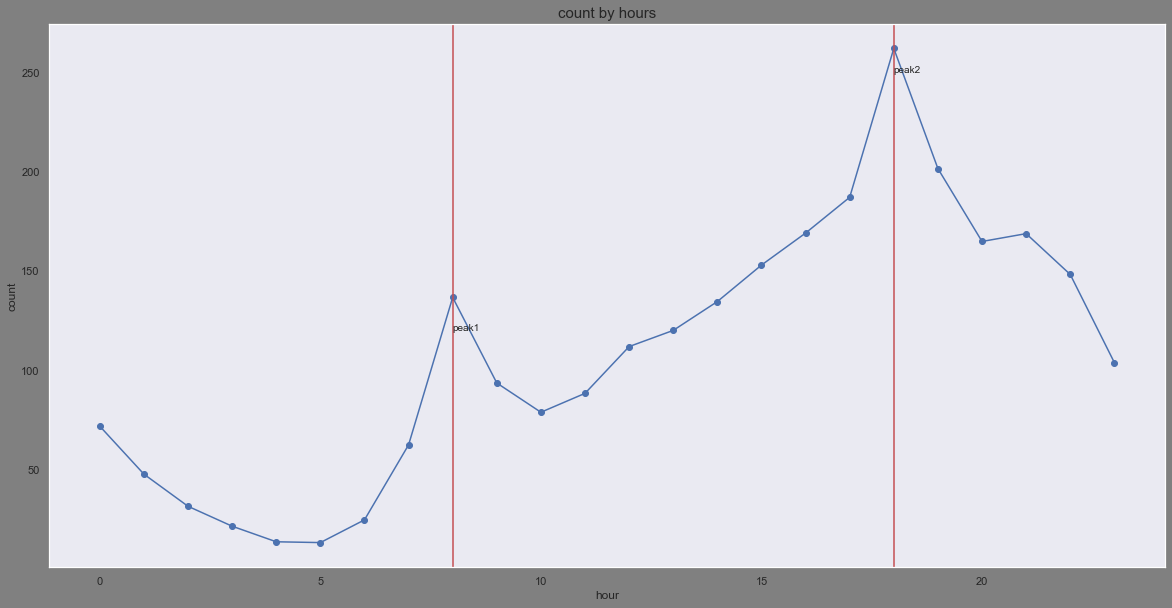

In [13]:
plt.figure(figsize = (20,10), facecolor='gray')
plt.plot(df_train.groupby('hour').mean()['count'], 'bo-')
plt.grid()

plt.title('count by hours', fontsize = 15)
plt.xlabel('hour', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.axvline(8, color='r')
plt.axvline(18, color='r')
plt.text(8,120,'peak1',fontsize=10)
plt.text(18,250,'peak2',fontsize=10)


#### Correlation

In [14]:
df_train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


<AxesSubplot:>

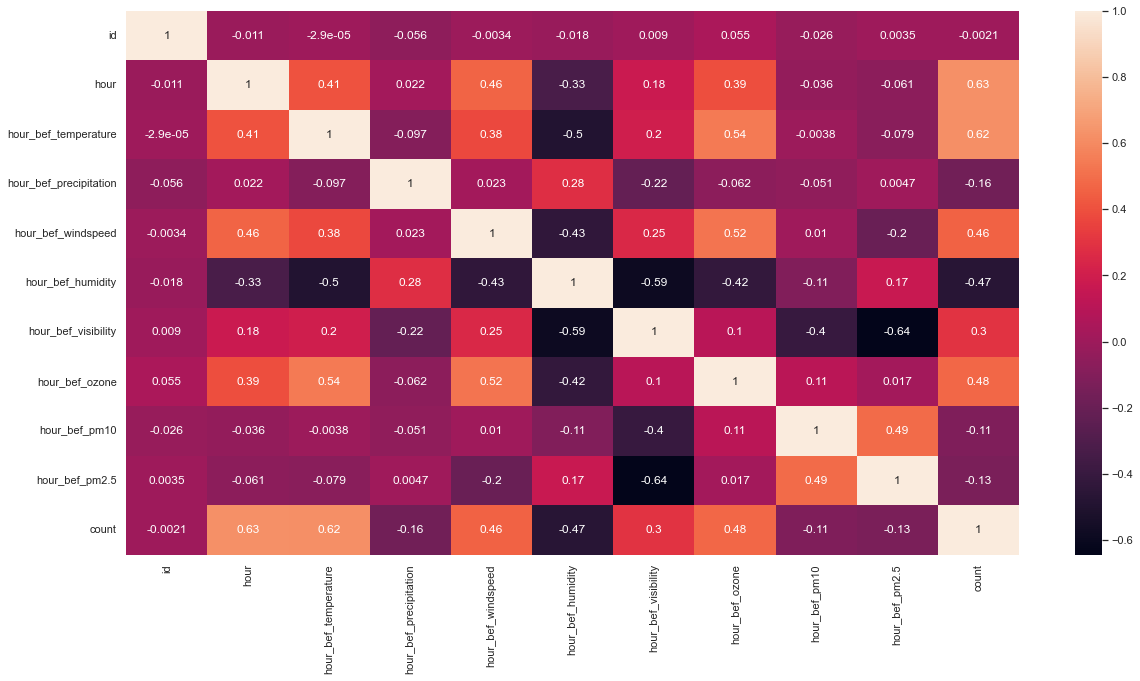

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

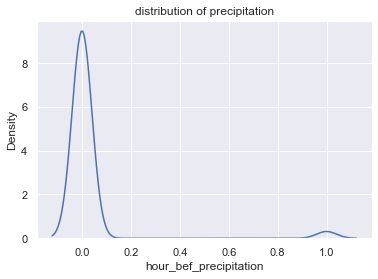

In [16]:
sns.kdeplot(df_train['hour_bef_precipitation'])
plt.title("distribution of precipitation")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

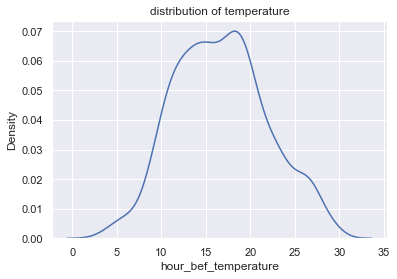

In [17]:
sns.kdeplot(df_train['hour_bef_temperature'])
plt.title("distribution of temperature")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

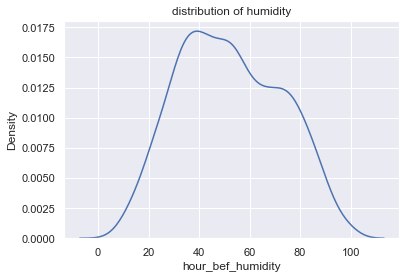

In [18]:
sns.kdeplot(df_train['hour_bef_humidity'])
plt.title("distribution of humidity")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

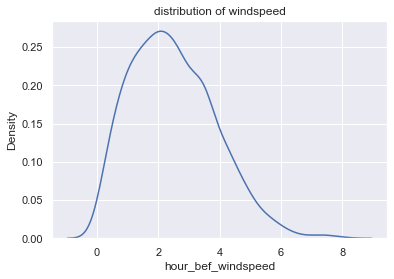

In [19]:
sns.kdeplot(df_train['hour_bef_windspeed'])
plt.title("distribution of windspeed")
plt.show

## PreProcessing

train, test data set 통합하여 다루기

In [20]:
df_train_and_test = [df_train, df_test]

missing data 채우기

temperature, percipitation, humidity, windspeed

In [21]:
df_train_and_test[0][df_train_and_test[0]['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [22]:
df_train_and_test[1][df_train_and_test[1]['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_train_and_test[0][df_train_and_test[0]['hour_bef_precipitation'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [24]:
df_train_and_test[1][df_train_and_test[1]['hour_bef_precipitation'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_train_and_test[0][df_train_and_test[0]['hour_bef_humidity'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [26]:
df_train_and_test[0][df_train_and_test[0]['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.6,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.1,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.0,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.3,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.5,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.4,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.0,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


test set 결측치 채우기

In [27]:
df_train_and_test[1][df_train_and_test[1]['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
for dataset in df_train_and_test:
    dataset['hour_bef_windspeed'] = dataset['hour_bef_windspeed'].fillna(dataset['hour_bef_windspeed'].mean())
    dataset['hour_bef_precipitation'] = dataset['hour_bef_precipitation'].fillna(dataset['hour_bef_precipitation'].mean())
    dataset['hour_bef_temperature'] = dataset['hour_bef_temperature'].fillna(dataset['hour_bef_temperature'].mean())
    dataset['hour_bef_humidity'] = dataset['hour_bef_humidity'].fillna(dataset['hour_bef_humidity'].mean())

In [29]:
df_train_and_test[1][df_train_and_test[1]['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5


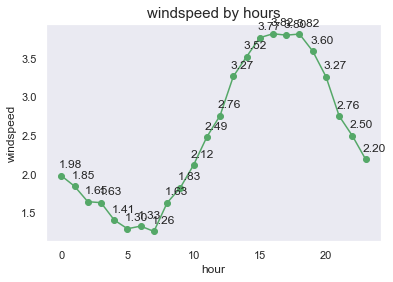

In [30]:
windspeedPerHous = df_train.groupby('hour').mean()['hour_bef_windspeed']

plt.plot(windspeedPerHous, 'go-')
plt.grid()

plt.title('windspeed by hours', fontsize = 15)
plt.xlabel('hour', fontsize=12)
plt.ylabel('windspeed', fontsize=12)

for i in range(0, len(windspeedPerHous)):
    plt.text(i-0.2, windspeedPerHous[i]+0.1, f'{windspeedPerHous[i]:.2f}')

In [31]:
for i in range(0,len(windspeedPerHous)):
    print(f'[{i}] hour : {windspeedPerHous[i]:.3f}')

[0] hour : 1.983
[1] hour : 1.847
[2] hour : 1.647
[3] hour : 1.634
[4] hour : 1.410
[5] hour : 1.297
[6] hour : 1.331
[7] hour : 1.262
[8] hour : 1.633
[9] hour : 1.830
[10] hour : 2.123
[11] hour : 2.485
[12] hour : 2.762
[13] hour : 3.268
[14] hour : 3.523
[15] hour : 3.769
[16] hour : 3.820
[17] hour : 3.802
[18] hour : 3.816
[19] hour : 3.595
[20] hour : 3.265
[21] hour : 2.755
[22] hour : 2.498
[23] hour : 2.195


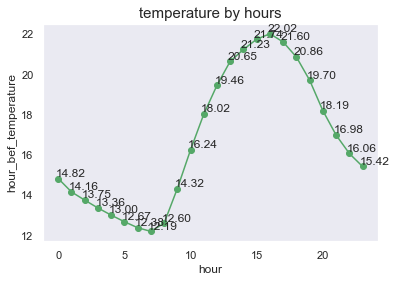

In [32]:
tmperaturePerHour = df_train.groupby('hour').mean()['hour_bef_temperature']

plt.plot(tmperaturePerHour, 'go-')
plt.grid()

plt.title('temperature by hours', fontsize = 15)
plt.xlabel('hour', fontsize=12)
plt.ylabel('hour_bef_temperature', fontsize=12)

for i in range(0, len(tmperaturePerHour)):
    plt.text(i-0.2, tmperaturePerHour[i]+0.1, f'{tmperaturePerHour[i]:.2f}')

Text(0, 0.5, 'hour_bef_precipitation')

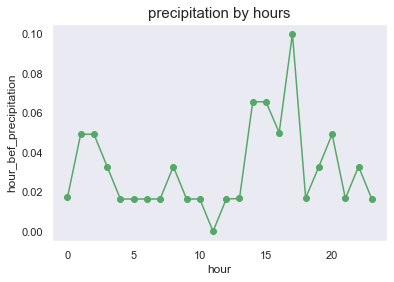

In [33]:
rainyPerHour = df_train.groupby('hour').mean()['hour_bef_precipitation']

plt.plot(rainyPerHour, 'go-')
plt.grid()

plt.title('precipitation by hours', fontsize = 15)
plt.xlabel('hour', fontsize=12)
plt.ylabel('hour_bef_precipitation', fontsize=12)

row drop

In [34]:
row_drop = df_train_and_test[0][df_train_and_test[0]['hour_bef_windspeed'].isna()].index
row_drop

Int64Index([], dtype='int64')

In [35]:
df_train_and_test[0].drop(row_drop, inplace=True)

feature drop

In [36]:
features_drop=['hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5','hour_bef_visibility']

In [37]:
df_train_and_test[0]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


Catergorization

In [38]:
for dataset in df_train_and_test:
    dataset.loc[ dataset['hour_bef_precipitation'] == 0, 'hour_bef_precipitation'] = 0
    dataset.loc[ dataset['hour_bef_precipitation'] == 1, 'hour_bef_precipitation'] = 1
    dataset['hour_bef_precipitation'] = dataset['hour_bef_precipitation'].astype(int)

In [39]:
for dataset in df_train_and_test:
    dataset.loc[ dataset['hour_bef_temperature'] < 10, 'hour_bef_temperature'] = 0
    dataset.loc[ (dataset['hour_bef_temperature'] >= 10) & (dataset['hour_bef_temperature'] < 15), 'hour_bef_temperature'] = 1
    dataset.loc[ (dataset['hour_bef_temperature'] >= 15) & (dataset['hour_bef_temperature'] < 20), 'hour_bef_temperature'] = 2
    dataset.loc[ (dataset['hour_bef_temperature'] >= 20) & (dataset['hour_bef_temperature'] < 25), 'hour_bef_temperature'] = 3
    dataset.loc[ dataset['hour_bef_temperature'] >= 25, 'hour_bef_temperature'] = 4
    dataset['hour_bef_temperature'] = dataset['hour_bef_temperature'].astype(int)

In [40]:
for dataset in df_train_and_test:
    dataset.loc[ dataset['hour_bef_humidity'] < 20, 'hour_bef_humidity'] = 0
    dataset.loc[ (dataset['hour_bef_humidity'] >= 20) & (dataset['hour_bef_humidity'] < 30), 'hour_bef_humidity'] = 1
    dataset.loc[ (dataset['hour_bef_humidity'] >= 30) & (dataset['hour_bef_humidity'] < 50), 'hour_bef_humidity'] = 2
    dataset.loc[ (dataset['hour_bef_humidity'] >= 50) & (dataset['hour_bef_humidity'] < 80), 'hour_bef_humidity'] = 3
    dataset.loc[ dataset['hour_bef_humidity'] >= 80, 'hour_bef_humidity'] = 4
    dataset['hour_bef_humidity'] = dataset['hour_bef_humidity'].astype(int)

In [41]:
for dataset in df_train_and_test:
    dataset.loc[ dataset['hour_bef_windspeed'] < 1, 'hour_bef_windspeed'] = 0
    dataset.loc[ (dataset['hour_bef_windspeed'] >= 1) & (dataset['hour_bef_windspeed'] < 2), 'hour_bef_windspeed'] = 1
    dataset.loc[ (dataset['hour_bef_windspeed'] >= 2) & (dataset['hour_bef_windspeed'] < 3), 'hour_bef_windspeed'] = 2
    dataset.loc[ (dataset['hour_bef_windspeed'] >= 3) & (dataset['hour_bef_windspeed'] < 4), 'hour_bef_windspeed'] = 3
    dataset.loc[ dataset['hour_bef_windspeed'] >= 4, 'hour_bef_windspeed'] = 4
    dataset['hour_bef_windspeed'] = dataset['hour_bef_windspeed'].astype(int)

<AxesSubplot:xlabel='hour_bef_precipitation', ylabel='count'>

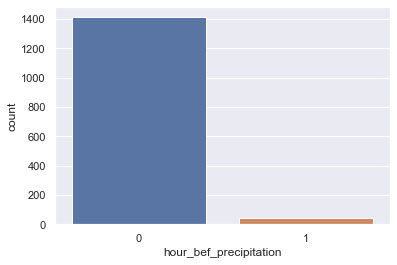

In [42]:
sns.countplot(x='hour_bef_precipitation', data=df_train_and_test[0])

<AxesSubplot:xlabel='hour_bef_temperature', ylabel='count'>

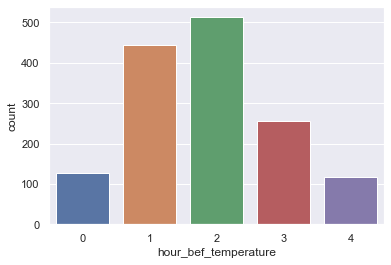

In [43]:
sns.countplot(x='hour_bef_temperature', data=df_train_and_test[0])

<AxesSubplot:xlabel='hour_bef_humidity', ylabel='count'>

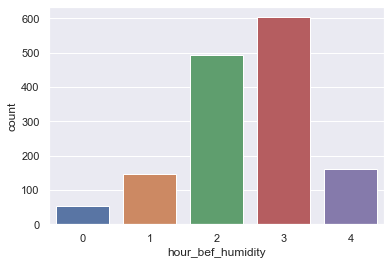

In [44]:
sns.countplot(x='hour_bef_humidity', data=df_train_and_test[0])

<AxesSubplot:xlabel='hour_bef_windspeed', ylabel='count'>

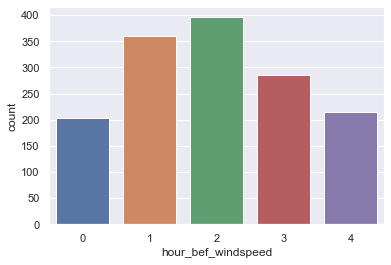

In [45]:
sns.countplot(x='hour_bef_windspeed', data=df_train_and_test[0])

In [46]:
df_train=df_train_and_test[0].drop(features_drop,axis=1)
df_test=df_train_and_test[1].drop(features_drop,axis=1)

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1459 non-null   int32  
 3   hour_bef_precipitation  1459 non-null   int32  
 4   hour_bef_windspeed      1459 non-null   int32  
 5   hour_bef_humidity       1459 non-null   int32  
 6   count                   1459 non-null   float64
dtypes: float64(1), int32(4), int64(2)
memory usage: 57.1 KB


In [48]:
df_train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,count
0,3,20,2,1,1,4,49.0
1,6,13,3,0,1,2,159.0
2,7,6,1,0,0,3,26.0
3,8,23,0,0,2,3,57.0
4,9,18,4,0,4,0,431.0


In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   id                      715 non-null    int64
 1   hour                    715 non-null    int64
 2   hour_bef_temperature    715 non-null    int32
 3   hour_bef_precipitation  715 non-null    int32
 4   hour_bef_windspeed      715 non-null    int32
 5   hour_bef_humidity       715 non-null    int32
dtypes: int32(4), int64(2)
memory usage: 22.5 KB


In [50]:
df_test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity
0,0,7,3,0,1,3
1,1,17,4,0,4,2
2,2,13,2,1,2,4
3,4,6,3,0,2,3
4,5,22,1,1,3,4


정답지 준비

In [51]:
df_train_label = df_train['count']

In [52]:
df_train_label.head()

0     49.0
1    159.0
2     26.0
3     57.0
4    431.0
Name: count, dtype: float64

In [53]:
df_train_label.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1459 entries, 0 to 1458
Series name: count
Non-Null Count  Dtype  
--------------  -----  
1459 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


train/test data set 준비

In [54]:
df_train_data = df_train.drop(['id','count'], axis=1)

In [55]:
df_train_data

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity
0,20,2,1,1,4
1,13,3,0,1,2
2,6,1,0,0,3
3,23,0,0,2,3
4,18,4,0,4,0
...,...,...,...,...,...
1454,4,2,0,1,3
1455,3,1,0,3,2
1456,5,2,0,1,3
1457,21,3,0,3,2


In [56]:
df_test_data = df_test.drop('id', axis=1)

In [57]:
df_test_data.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity
0,7,3,0,1,3
1,17,4,0,4,2
2,13,2,1,2,4
3,6,3,0,2,3
4,22,1,1,3,4


## Prediction by Model

In [73]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor

In [59]:
def predict_by_model(model):
    model.fit(df_train_data, df_train_label)
    prediction = model.predict(df_test_data)
    accuracy = round(model.score(df_train_data,df_train_label) * 100, 2)
    print("Accuracy:", accuracy, "%")
    return prediction

In [66]:
lr_pred = predict_by_model(LinearRegression())

Accuracy: 57.94 %


In [71]:
ridge_pred = predict_by_model(Ridge())

Accuracy: 57.94 %


In [72]:
ridge_pred = predict_by_model(Lasso())

Accuracy: 57.44 %


In [76]:
xgb_pred = predict_by_model(XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsampl=0.8))

[15:57:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "subsampl" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Accuracy: 80.68 %


## Submission

In [77]:
# Final prediction
predictions = xgb_pred
predictions_df = pd.DataFrame(predictions)

submission = pd.concat([df_test['id'], predictions_df], axis = 'columns')

submission.columns = ["id", "count"]
submission.to_csv('ddareungi_challenge_dg_2.csv', header=True, index=False)

## Result

LinearRegression model score : 68.68613

XGBRegressor model score : 49.63617